
<a id='julia-by-example'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Exemplos Introdutórios

## Conteúdo

- [Exemplos Introdutórios](#Exemplos-Introdutórios)  
  - [Resumo](#Resumo)  
  - [Exemplo: Plotando um Processo de Ruído Branco](#Exemplo:-Plotando-um-Processo-de-Ruído-Branco)  
  - [Exemplo: Variações em Pontos Fixo](#Exemplo:-Variações-em-Pontos-Fixo)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Agora estamos prontos para comecar a aprender Julia por sí mesmo.

### Nível
Nossa abordagem é voltada para aqueles que já têm pelo menos algum conhecimento de programação - talvez experiência com Python, MATLAB, Fortran, C ou similar.

Em particular, presumimos que você tenha alguma familiaridade com conceitos fundamentais de programação, como:

- Variáveis   
- Matrizes ou vetores  
- Loops  
- Condicionais (if/else)  

### Abordagem

Nesta aula, escreveremos e escolheremos pequenos programas com Julia.

Nesta fase, o objetivo é apresentar as estruturas básicas de sintaxe e dados.

Conceitos mais profundos - como as coisas funcionam - serão abordados em aulas posteriores.

Como procuramos simplicidade, os exemplos são um pouco artificiais.

Nesta aula, muitas vezes começaremos com uma abordagem direta do MATLAB/FORTRAN, que geralmente é um **estilo de codificação ruim** em Julia, mas depois avançaremos para um **código mais elegante**, que está fortemente conectado à matemática.


### Configuração

Assumimos que você já trabalhou na [nossa aula de introdução](https://lectures.quantecon.org/getting_started.html). 

Em particular, a maneira mais fácil de instalar e pré-compilar todos os pacotes Julia usadosnas notas do QuantEcon é digitar `] add InstantiateFromURL` e trabalhar em um notebook Jupyter, conforme [aqui](https://lectures.quantecon.org/getting_started.html) descrito.

### Outras referências

A referência definitiva é [a própria documentação do Julia](https://docs.julialang.org/en/v1/).

O manual foi cuidadosamente escrito, mas também é bastante denso (e um tanto formal).

A apresentação nesta e em nossas aulas restantes é mais um estilo de tutorial baseado em exemplos.

## Exemplo: Plotando um Processo de Ruído Branco

Para começar, vamos supor que queremos simular e plotar o processo de ruído branco $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, onde cada $ \epsilon_t $ é independente e padrão normal.

### Introdução aos Pacotes

A primeira etapa é ativar um ambiente de projeto, que é encapsulado por `Project.toml` e `Manifest.toml`. 


Existem três maneiras de instalar pacotes e versões (onde os dois primeiros métodos são desencorajados, pois podem levar a versões de pacotes fora de sincronia com as notas de aula).

1. `add` os pacotes diretamente em sua instalação global (por exemplo, `Pkg.add("MyPackage")` ou `] add MyPackage`)  
1. Baixe os arquivos `Project.toml`  e   `Manifest.toml` no mesmo diretório como as notas de aula (ou seja, pelo argumento `@__DIR__`), e depois digite `using Pkg; Pkg.activate(@__DIR__);`  
1. Use o pacote `InstantiateFromURL`. 

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

Se você nunca executou esse código em um computador específico, é provável que demore muito tempo, pois ele baixa, instala e compila todos os pacotes dependentes.

Este código irá baixar e instalar arquivos de projeto do GitHub, [QuantEcon/QuantEconLecturePackages](https://github.com/QuantEcon/QuantEconLecturePackages/).

Discutiremos mais em [Ferramentas e Editores](https://lectures.quantecon.org/more_julia/tools_editors.html#tools-editors), mas esses arquivos fornecem uma lista de pacotes e versões usados pelo código.

Isso garante que um ambiente para execução de código seja **reproduzível**, para que qualquer pessoa possa replicar o conjunto preciso de pacote e versões usados na construção.

A seleção cuidadosa das versões dos pacotes é crucial para a reprodutibilidade, caso contrário, seu código pode ser quebrado por alterações nos pacotes fora de seu controle.

Após a instalação e ativação `using` ornece uma maneira de dizer que um código ou nota de aula específica usará o pacote.


In [2]:
using LinearAlgebra, Statistics


<a id='import'></a>

#### Usando Funções de um Pacote

Algumas funções são construídas dentro da base do Julia, como, por exemplo `randn`, que retorna um único sorteio aleatório a partir de uma distinção normal com média 0 e variância 1 se não houver parâmetros.

In [3]:
randn()

0.7212803417668585

Outras funções requerem a importação de todos os nomes de uma biblioteca externa.

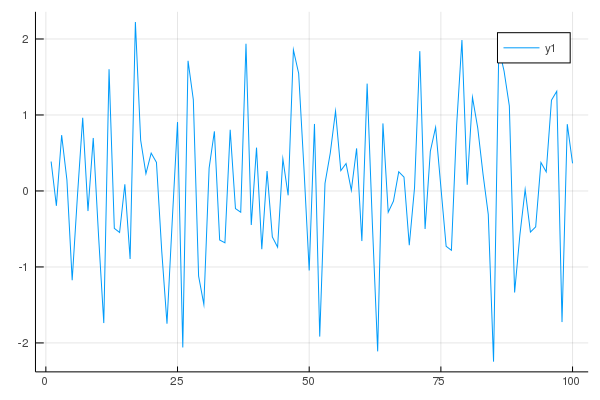

In [4]:
using Plots
gr(fmt=:png); #  configurado para facilitar a exibição nas notas de aula

n = 100
ϵ = randn(n)
plot(1:n, ϵ)

Vamos dividir isso e ver como funciona.

O efeito da instrução `using Plots` é disponibilizar todos os nomes exportados pelo módulo disponivel `Plots`

Como usamos `Pkg.activate` anteriormente, ele usará a versão `Plots.jl` especificada nos arquivos `Project.toml` e`Manifest.toml`

Os outros pacotes `LinearAlgebra` e `Statistics` estão na bibliteca base do Julia, mas requerem um uso explícito.

Os argumentos para `plot` são os numeros `1,2, ..., n` para o eixo x, um vetor `ϵ` para o eixo y, e as configurações (opcionais).

A função `randn(n)` retorna um vetor `n` aleatório de colunas a partir de uma distribuição normal com média 0 e variâcia 1.

### Matrizes

Como uma linguagem destinada à computação matemática e científica, Julia tem forte suporte ao uso de caracteres unicode.

No caso acima, o `ϵ` e muitos outros símbolos podem ser digitados na maioria dos editores Julia, pelo fornecimento do LaTeX e `<TAB>`, por exemplo `\epsilon<TAB>`.

O retorno `type` é um dos tipos de dados Julia mais fundamentais: uma matriz

In [5]:
typeof(ϵ)

Array{Float64,1}

In [6]:
ϵ[1:5]

5-element Array{Float64,1}:
  0.38714640742067463
 -0.19563108859176853
  0.7345330359004757 
  0.1447586809493503 
 -1.174625420440977  

As informações de `typeof()` nos informam que `ϵ` é uma matriz de valores de ponto flutuante de 64 bits, da dimensão 1.

Em Julia, matrizes unidimensionais são interpretadas como vetores de coluna para fins de álgebra linear.

Os `ϵ[1:5]` retorna uma matriz dos primeiros 5 elementos de `ϵ`.

Observe acima que:

- Índices de matriz começam em 1 (como MATLAB e Fortran, mas diferentemente de Python e C)  
- Os elementos da matriz são referenciados usando colchetes (ao contrário do MATLAB e Fortran) 

Para obter **ajuda e exemplos** no Jupyter ou em outro editor julia, use o `?` antes da função, nome ou a sintaxe: 

```julia
?typeof

search: typeof typejoin TypeError

Get the concrete type of x.

Examples

julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Array{Float64,2}
```


### For Loops

Embora não haja necessidade em termos do que queríamos alcançar com o nosso programa, para aprender a sintaxe, vamos reescrever nosso programa para usar um `for` loop para gerar os dados.

>**Nota**
>
>Em Julia v0.7 ou posterior, as regras para variáveis acessadas `for` e `while`loops podem ser sensíveis à forma como são usadas (e às vezes as variáveis podem exigir um `global` como parte da declaração). Recomendamos enfaticamente que você evite o nível superior (ou seja, no REPL ou fora das funções) `for` e `while` loops fora das notas de aula no Jupyter. Este problema não se aplica quando usado em funções.

Começando com a versão mais direta e fingindo que estamos em um mundo em `randn` que só podemos retornar um único valor:


In [7]:
# Estilo ruim 
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

Aqui primeiro declaramos `ϵ` para ser o vetor de `n` números, inicializando pelo ponto flutuante `0.0`.

O `for`loop então preenche essa matriz por chamadas sucessivas para `randn()`.

Como todos os blocos de código em Julia, o final do bloco de código `for` loop (que é apenas uma linha aqui) é indicado pela palavra-chave `end`.

A palavra `in` do `for` oop pode ser substituída por um `∈` or `=`.

A variável de índice é repetida para todos os números inteiros de `1:n` – mas isso não cria um vetor desses índices.

Em vez disso, ele cria um **iterator** que é repetido - nesse caso, o **range** (intervalo) de números inteiros de `1` a `n`.

Embora este exemplo preencha  `ϵ` com sucesso, os valores corretos, é muito indireto, pois a conexão entre o índice `i` e o vetor`ϵ` não é clara.

Para consertar isso, usamos `eachindex`:

In [8]:
# Estilo melhor
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

Aqui, `eachindex(ϵ)` retorna um iterador de índices que pode ser usado para acessar `ϵ`.

Embora os iteradores sejam eficientes em termos de memória, porque os elementos são gerados em tempo real e não armazenados na memória, o principal benefício é (1) que pode levar a códigos mais claros e menos propensos a erros de digitação; e (2) permite que a flexibilidade do compilador gere criativamente códigos rápidos.

Em Julia, você também pode fazer um loop diretamente sobre as próprias matrizes, assim:

In [9]:
ϵ_sum = 0.0 # cuidado ao usar 0.0 aqui, em vez de 0 
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

0.4690578188001928

Onde `ϵ[1:m]` retorna os elementos do vetor nos índices  `1` para `m`.

Obviamente, em Julia, existem funções integradas para realizar esse cálculo que podemos comparar:

In [10]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m]) / m

true

Nestes exemplos, observe o uso de `≈` para testar a igualdade, em vez de `==`, o que é apropriado para números inteiros e outros tipos.

Aproximadamente igual, digitado `\approx<TAB>`,  é a maneira apropriada de comparar números de ponto flutuante devido aos problemas padrão da [matemática do ponto flutuante](https://floating-point-gui.de/).


<a id='user-defined-functions'></a>

### Funções definidas pelo usuário

Para o exercício, vamos voltar ao `for` loop  mas reestruturaremos nosso programa para que a geração de variáveis aleatórias ocorra dentro de uma função definida pelo usuário.

Para tornar as coisas mais interessantes, em vez de plotar diretamente os sorteios da distribuição, vamos plotar os quadrados desses sorteios.

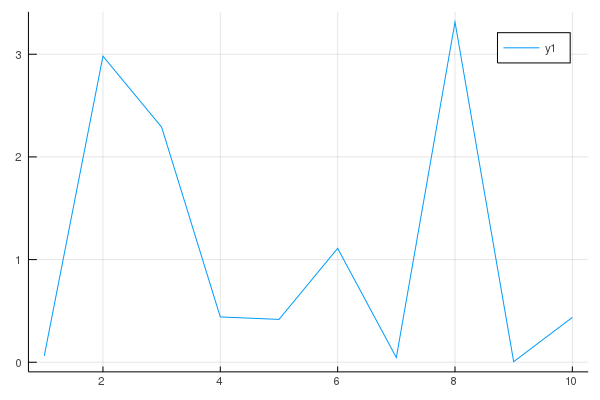

In [11]:
# estilo ruim
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # resultado ao quadrado
    end
    return ϵ
end

data = generatedata(10)
plot(data)

aqui:

- `function` é uma palavra-chave Julia que indica o início de uma definição de função 
- `generatedata` é um nome arbitrário para a função  
- `return` é uma palavra-chave que indica o valor de retorno, pois muitas vezes é desnecessário


Vamos tornar este exemplo um pouco melhor "lembrando" que `randn` pode retornar um vetor.

In [12]:
# ainda estilo ruim
function generatedata(n)
    ϵ = randn(n) # use built em função

    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2 # resultado ao quadrado
    end

    return ϵ
end
data = generatedata(5)

5-element Array{Float64,1}:
 0.18359185127416122
 0.5891205422703394 
 1.1724800636048704 
 1.4774865451834729 
 3.85655080601639   

Embora melhor, o loop sobre o indice ao quadrado `i` os resultados são difíceis de ler. 

Em vez de fazer um loop, podemos **transmitir** a função ao quadrado `^2` sobre um vetor usando um `.`.

Para ser claro, diferentemente do Python, R e MATLAB (em menor grau), o motivo de descartar `for` **não** é por motivos de desempenho, mas por causa da clareza do código.

Loops desse tipo são pelo menos tão eficientes quanto a abordagem vetorizada em linguagens compiladas como Julia, portanto, use um for loop se achar que isso torna o código mais claro.

In [13]:
# Estilo melhor
function generatedata(n)
    ϵ = randn(n) # use built em uma função
    return ϵ.^2
 end
data = generatedata(5)

5-element Array{Float64,1}:
 1.5639067283207742 
 0.6533763494000251 
 0.15513804416395885
 0.563686044171608  
 0.11951832291600444

Podemos até descartar a `função` se definirmos em uma única linha.

In [14]:
# estilo bom
generatedata(n) = randn(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 2.3712340206904456 
 0.0446228851242191 
 3.3102710656468224 
 0.05199594623429365
 0.30190197995416235

Finalmente, podemos transmitir qualquer função, onde o quadrado é apenas um caso especial.

In [15]:
# estilo bom
f(x) = x^2 # função quatrática simples
generatedata(n) = f.(randn(n)) # usa transmissão para alguma função `f`
data = generatedata(5)

5-element Array{Float64,1}:
 1.9954341011123615 
 0.23874633195970144
 0.5705135833453187 
 0.6563922985806661 
 2.368257825814934  

Como uma abordagem final abstrata, podemos tornar a função `generatedata` capaz de aplicar genericamente a uma função.

In [16]:
generatedata(n, gen) = gen.(randn(n)) # usa a transmissãp para alguma função `gen`

f(x) = x^2 # função quadrática simples
data = generatedata(5, f) # aplica-se a  f

5-element Array{Float64,1}:
 0.034127418665920894
 2.0484526384981585  
 0.8546459410733096  
 0.17454818129429442 
 0.20580795960989198 

Se este exemplo é melhor ou pior que a versão anterior depende de como é usado.

Altos graus de abstração e generalidade, por exemplo, passar uma função `f` nesse caso, pode tornar o código mais claro ou mais confuso, mas Julia permite que você use essas técnicas **sem sobrecarga de desempenho**.

Nesse caso em particular, a solução mais clara e mais geral é provavelmente a mais simples.

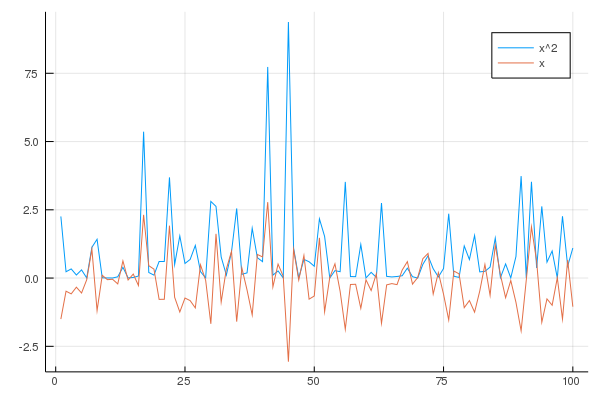

In [17]:
# solução direta com transmissão e pequena função definida pelo usuário
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label="x^2")
plot!(x, label="x") # camada no mesmo gráfico

Embora a transmissão acima pareça superficialmente funções de vetorização no MATLAB ou nos ufuncs Python, ela é muito mais rica e construída sobre os fundamentos básicos da linguagem.

A outra função adicional `plot!` adiciona um gráfico ao gráfico existente.

Isso segue uma convenção geral em Julia, onde uma função que modifica os argumentos ou um estado global tem um `!` no final do nome.

#### Uma função um pouco mais útil 

Vamos criar uma função um pouco mais útil.

Essa função será passada em uma escolha de distribuição de probabilidade e responderá plotando um histograma de observações.

Ao fazer isso, usaremos o pacote `Distributions`, que assumimos ter sido instanciado acima com o projeto.

Aqui está o código:

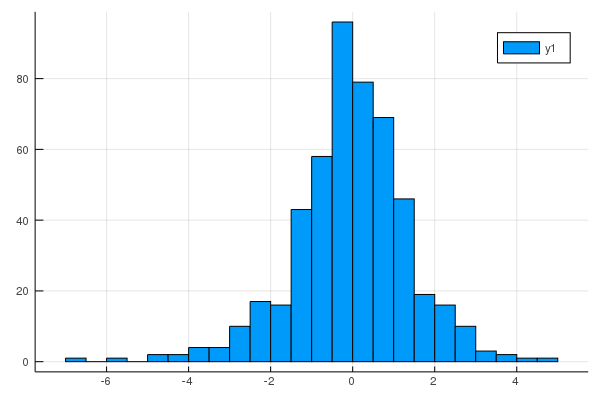

In [18]:
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n)  # n extrações de uma distribuição
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp, 500)

Vamos ter uma discussão casual de como tudo isso funciona, deixando detalhes técnicos para mais adiante nas aulas.

Primeiro, `lp = Laplace()` cria uma instância de um tipo de dados definido no módulo `Distributions` que representa a distribuição Laplace.

O nome `lp` está vinculado a este valor.

Quando fazemos a chamada da função, `plothistogram(lp, 500)` to código no corpo da função `plothistogram` é executado com:

- o nome `distribution` associado ao mesmo valor que `lp`  
- o nome `n` associado ao número de inteiros `500`  

#### Um Mistério

Agora considere a chamada de função `rand(distribution, n)`.

Isso parece um mistério.

A função `rand()` é definida na biblioteca base de modo que `rand(n)` retorne `n` variáveis aleatórias uniformes em $ [0, 1) $.

In [19]:
rand(3)

3-element Array{Float64,1}:
 0.31279000003225055
 0.5354866108235432 
 0.1281039447653447 

Por outro lado, `distribution` aponta para um tipo de dados que representa a distribuição Laplace que foi definida em um pacote de terceiros.

Então, como pode ser `rand()` capaz de pegar esse tipo de valor como argumento e retornar a saída que queremos?

A resposta em poucas palavras é o **envio múltiplo**, que Julia usa para implementar **programação genérica**.
Isso se refere à ideia de que as funções em Julia podem ter um comportamento diferente, dependendo dos argumentos específicos pelos quais são passados.

Portanto, em Julia, podemos pegar uma função existente e dar-lhe um novo comportamento, definindo como ela age em um novo tipo de valor.

O compilador sabe em qual definição de função aplicar em uma determinada configuração, observando os tipos de valores nos quais a função é chamada.

Em Julia, essas versões alternativas de uma função são chamadas **métodos**.

## Exemplo: Variações em Pontos Fixo

Faça um mapeamento $ f : X \to X $ para algum conjunto $ X $.

Se existir um  $ x^* \in X $ tal que $ f(x^*) = x^* $, então $ x^* $:  é chamado de "ponto fixo" de $ f $.

Para o nosso segundo exemplo, começaremos com um exemplo simples de determinação de pontos fixos de uma função.

O objetivo é começar com o código no estilo MATLAB e avançar para um estilo mais ***Juliano***, com alta clareza matemática.

### Mapas de ponto fixo

Considere a equação simples, onde os escalares $ p,\beta $ são dados, e $ v $ é o escalar que desejamos resolver para:

$$
v = p + \beta v
$$

Obviamente, neste exemplo simples, com restrições de parâmetro, isso pode ser resolvido como $ v = p/(1 - \beta) $.

Reorganize a equação em termos de um mapa $ f(x) : \mathbb R \to \mathbb R $.


<a id='equation-fixed-point-map'></a>
$$
v = f(v) \tag{1}
$$

onde

$$
f(v) := p + \beta v
$$

Portanto, um ponto fixo $ v^* $ de $ f(\cdot) $ é uma solução para o problema acima.

### While Loops

Uma abordagem para encontrar um ponto fixo de [(1)](#equation-fixed-point-map) é começar com um valor inicial e iterar o mapa:


<a id='equation-fixed-point-naive'></a>
$$
v^{n+1} = f(v^n) \tag{2}
$$

Para esta função `f`,  nos podemos ver a convergência para $ v = p/(1-\beta) $ quando $ |\beta| < 1 $ iterando para trás e usando $ n\to\infty $.

$$
v^{n+1} = p + \beta v^n = p + \beta p + \beta^2 v^{n-1} = p \sum_{i=0}^{n-1} \beta^i + \beta^n v_0
$$

Para implementar a iteração em [(2)](#equation-fixed-point-naive), começamos resolvendo esse problema com um `while` loop

A sintaxe do loop while não contém surpresas e parece quase idêntica a uma implementação do MATLAB.

In [20]:
# estilo ruim
p = 1.0 # nota 1.0 em vez de 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # condição inicial

# configuração do algoritimo
v_old = v_iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + β * v_old # o mapa f(v)
    normdiff = norm(v_new - v_old)

    # subistitua e continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


O `while` loop, como o `for` loop, deve ser usado apenas diretamente no Jupyter ou no interior de uma função.

Aqui, nós usamos a função `norm` (do pacote `LinearAlgebra` da biblioteca) para comparar os valores.

A outra nova função é a `println` com a interpolação do *string*, que emenda o valor de uma expressão ou variável prefixada por $ em um *string*.

Uma abordagem alternativa é usar um `for` loop e verificar a convergência em cada iteração.

In [21]:
# configure o algoritimo
v_old = v_iv
normdiff = Inf
iter = 1
for i in 1:maxiter
    v_new = p + β * v_old # o mapa f(v) 
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance # verifique a convergência
        iter = i
        break # convergido, loop de saida
    end
    # substitua e continue
    v_old = v_new
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231, and |f(x) - x| = 9.181037796679448e-8 in 154 iterations


O novo recurso existente é `break`, o que leva um `for`ou `while`.

### Usando uma Função

O primeiro problema com essa configuração é que depende da execução sequencial - o que pode ser facilmente remediado com uma função.

In [22]:
# melhor, mas ainda em um estilo ruim
function v_fp(β, ρ, v_iv, tolerance, maxiter)
    # configure o algoritimo
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old # o mapa f(v)
        normdiff = norm(v_new - v_old)

        # substitua e continua
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter) # retorna uma tupla
end

# alguns valores
p = 1.0 # nota 1.0 em vez de 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # condição inicial

v_star, normdiff, iter = v_fp(β, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


Embora melhor, ainda pode haver melhorias.

### Passando uma Função 

A principal questão é que o algoritmo (encontrar um ponto fixo) é reutilizável e genérico, enquanto a função que calculamos `p + β * v` é específica para o nosso problema.

Um recurso importante de linguagens como Julia, é a capacidade de lidar com funções passadas para outras funções com eficiência.

In [23]:
# estilo melhor
function fixedpointmap(f, iv, tolerance, maxiter)
    # configure o algoritimo
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) #  use o passado no mapa
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# defina um mapa e parâmetros
p = 1.0
β = 0.9
f(v) = p + β * v # observe que p e β são usados na função!
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # condição inicial

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


Muito mais perto, mas ainda existem erros ocultos se o usuário solicitar as configurações ou retornar tipos incorretos.

### Argumentos nomeados e valores de retorno 

Para habilitar isso, Julia possui dois recursos: parâmetros de funções nomeadas e *tuples* nomeadas.

In [24]:
# estilo bom
function fixedpointmap(f; iv, tolerance=1E-7, maxiter=1000)
    # configure o algoritimo
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use o passado no mapa
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # uma tupla nomeado
end

# defina um mapa e parâmetros
p = 1.0
β = 0.9
f(v) = p + β * v # observe que p e β são usados na função!

sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # não precisa passar
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

Fixed point = 9.999999918629035, and |f(x) - x| = 9.041219328764782e-9 in 177 iterations


Neste exemplo, todos os parâmetros de função após o `;` na lista devem ser chamados pelo nome.

Além disso, um valor padrão pode ser ativado - portanto, o parâmetro nomeado `iv` é necessário enquanto `tolerance` e `maxiter` possui valores padrão.

O tipo de retorno da função também possui campos nomeados `value, normdiff,` e `iter` – todos acessados intuitivamente usando `.`.

Para mostrar a flexibilidade deste código, podemos usá-lo para encontrar um ponto fixo da equação logística não linear,
$ x = f(x) $ where $ f(x) := r x (1-x) $.

In [25]:
r = 2.0
f(x) = r * x * (1 - x)

sol = fixedpointmap(f, iv=0.8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968, and |f(x) - x| = 3.979330237546819e-8 in 7 iterations


### Usando um Pacote

Mas o melhor de tudo é evitar escrever código completamente.

In [26]:
# estilo melhor
using NLsolve

p = 1.0
β = 0.9
f(v) = p .+ β * v # transmita o +
sol = fixedpoint(f, [0.8])
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


A função  `fixedpoint` da biblioteca `NLsolve.jl` implementa o esquema de iteração de ponto fixo simples acima.

Como a biblioteca `NLsolve` aceita apenas entradas baseadas em vetores, é necessário `f(v)` transmitir a função no sinal `+` e passar na condição inicial como um vetor de comprimento 1 com `[0.8]`.

Enquanto um dos principais benefícios do uso de um pacote é que o código é mais claro e a implementação é testada, usando uma biblioteca ortogonal, também permitimos aprimoramentos de desempenho.

In [27]:
# estilo melhor
p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


Observe que isso é concluído nas `3` iterações vs `177` para o algoritmo de iteração de ponto fixo ingênuo.

Como a iteração Anderson está fazendo mais cálculos em uma iteração, se é mais rápida ou não, dependeria da complexidade da `f` 
função.

Mas isso demonstra o valor de manter a matemática separada do algoritmo, pois, ao dissociar a definição matemática do ponto fixo da implementação em [(2)](#equation-fixed-point-naive), conseguimos explorar novos algoritmos para encontrar um ponto fixo.

A única outra alteração nessa função é a mudança de definir `f(v)` e usar diretamente uma função **anônima**.

Semelhante a funções anônimas no MATLAB e funções lambda em Python, Julia permite a criação de pequenas funções sem nomes.

O código `v -> p .+ β * v` define uma função com argumentos *dummy*, `v` com o mesmo formato do nosso `f(x)`.

### Compondo Pacotes

Um dos principais benefícios do uso de Julia é que você pode compor vários pacotes, tipos e técnicas, sem fazer alterações na fonte subjacente.

Como exemplo, considere se que queremos resolver o modelo com uma precisão mais alta, pois os pontos flutuantes não podem ser distinguidos além do epsilon de máquina para esse tipo (lembre-se de que os computadores aproximam números reais ao binário mais próximo de uma determinada precisão; o *epsilon de máquina* é a menor magnitude diferente de zero).

Em Julia, o número pode ser calculado como:

In [28]:
eps()

2.220446049250313e-16

Para muitos casos, isso é precisão suficiente - mas considere que em algoritmos iterativos aplicados milhões de vezes, essas pequenas diferenças podem aumentar.

A única alteração que precisaremos para nosso modelo para usar um tipo de ponto flutuante diferente é chamar a função com um ponto flutuante de precisão arbitrário `BigFloat`, para o valor inicial.

In [29]:
# use pontos flutuantes de precisão arbitrária
p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # maior precisão

# caso contrário idêntico 
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155], and |f(x) - x| = 0.0 in 3 iterations


Aqui, o literal `BigFloat(0.8)` pega o número `0.8` e o altera para um número de precisão arbitrário.

O resultado é que o residual agora é **exatamente** `0.0` uma vez que é capaz de usar precisão arbitrária nos cálculos, e a solução possui uma solução de precisão finita com esses parâmetros.

### Mapas Multivariados de Pontos Fixos

O exemplo acima pode ser estendido para mapas multivariados sem nenhuma modificação no código de iteração de ponto fixo

Usando nossa própria iteração doméstica e simplesmente passando em um mapa bivariado:

In [30]:
p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]
f(v) = p .+ β * v # observe que p e β são usados na função!

sol = fixedpointmap(f, iv = iv, tolerance = 1.0E-8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
"iterations")

Fixed point = [9.999999961080519, 19.999999923853192], and |f(x) - x| = 9.501826248250528e-9 in 184iterations


Isso também funciona sem nenhuma modificação com a função da biblioteca `fixedpoint` .

In [31]:
using NLsolve

p = [1.0, 2.0, 0.1]
β = 0.9
iv =[0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999998, 20.0, 1.0], and |f(x) - x| = 0.0 in 3 iterations


Por fim, para demonstrar a importância de compor bibliotecas diferentes, use um  *tipo* `StaticArrays.jl` que forneça uma implementação eficiente para pequenos *arrays* e matrizes.

In [32]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = @SVector  [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999998, 20.0, 1.0], and |f(x) - x| = 0.0 in 3 iterations


O `@SVector` em frente do `[1.0, 2.0, 0.1]` é uma macro para transformar um literal de vetor em um vetor estático.

Todas as macros em Julia são prefixadas `@` no nome e manipulam o código antes da compilação.

Veremos uma variedade de macros e discutiremos a "meta programação" por trás deles em uma aula posterior.

## Exercícios


<a id='jbe-ex1'></a>

### Exercício 1

Lembre-se de que $ n! $ é lido como “$ n $ factorial” e definido como
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

Em Julia você pode computar esse valor como `factorial(n)`.

Escreva sua própria versão dessa função, chamada `factorial2`, usando um `for` loop.


<a id='jbe-ex2'></a>

### Exercício 2

A [variável binomial aleatória](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ representa:

- o número de sucessos $ n $ tentativas binárias  
- cada tentativa é bem-sucedida com a probabilidade $ p $  


Usando apenas `rand()` do conjunto dos geradores de números aleatórios incorporados de Julia (não o pacote `Distributions` pacote), escreva uma função `binomial_rv` tal que `binomial_rv(n, p)` gere um empate de $ Y $.

Dica: Se $ U $ é uniforme em $ (0, 1) $ e $ p \in (0,1) $, então a expressão é `U < p` avalia `true` com a probabilidade $ p $.


<a id='jbe-ex3'></a>

### Exercício 3

Calcule uma aproximação para $ \pi $ usando Monte Carlo.

Para geração de números aleatórios, use apenas `rand()`

Suas dicas são as seguintes:

- Se $ U $ é uma variável aleatória uniforme bivariada no quadrado da unidade  $ (0, 1)^2 $, entao a probabilidade que $ U $ encontra-se em um subconjunto $ B $ de $ (0,1)^2 $ é igual a área de $ B $  
- Se $ U_1,\ldots,U_n $ são cópias iid de $ U $, então, como $ n $ aumenta, a fração cai em $ B $ convergindo para a probabilidade de atracagem $ B $  
- Para um circulo, área = π * $ radius^2 $  



<a id='jbe-ex4'></a>

### Exercício 4

Escreva um programa que *printa* uma realização do seguinte dispositivo aleatório:

- Jogue uma moeda imparcial 10 vezes
- Se três cabeças consecutivas ocorrerem uma ou mais vezes nesta sequência, pague um dólar
- Caso contrário, não pague nada


Mais uma vez, use apenas `rand()` como seu gerador de números aleatórios.


<a id='jbe-ex5'></a>

### Exercício 5

Simule e plote as séries temporais correlacionadas.

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{onde} \quad
x_0 = 0
\quad \text{e} \quad t = 0,\ldots,n
$$

A sequência de choques $ \{\epsilon_t\} $ é considerado iid e normal padrão.

Defina $ n = 200 $ e $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

### Exercício 6

Traçe três séries temporais simuladas, uma para cada um dos casos  $ \alpha = 0 $, $ \alpha = 0.8 $ e $ \alpha = 0.98 $

(A figura ilustra como as séries temporais com as mesmas volatilidades condicionais um passo à frente, como esses três processos, podem ter volatilidades incondicionais muito diferentes).


<a id='jbe-ex7'></a>

### Exercício 7

Este exercício é mais desafiador.

Faça um passeio aleatório, começando em  $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{onde} \quad
x_0 = 1
\quad \text{e} \quad t = 0,\ldots,t_{\max}
$$

- Além disso, suponha que o  $ x_{t_{\max}} = 0 $  (ou seja, em $ t_{\max} $, o valor cai para zero, independentemente do estado atual)
- A sequência de choques $ \{\epsilon_t\} $  é considerado iid e normal padrão
- Para um determinado caminho  $ \{x_t\} $ defina um tempo de **primeira passagem** como  $ T_a = \min\{t\, |\, x_t \leq a\} $, onde pela suposição do processo $ T_a \leq t_{\max} $  


Comece com $ \sigma = 0.2, \alpha = 1.0 $

1. calcule o tempo da primeira passagem, $ T_0 $, para 100 passeios aleatórios simulados - até uma $ t_{\max} = 200 $ e plot um histograma 
1. plote a média da amostra de $ T_0 $ da simulação para $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

### Exercício 8(a)

Este exercício é mais desafiador.

A raiz de uma função univariada  $ f(\cdot) $ é um $ x $ tal que $ f(x) = 0 $

Um método de solução para encontrar raízes locais de funções suaves é chamado método de Newton.

Começando com uma suposição de $ x_0 $, uma função $ f(\cdot) $ e a primeira derivada $ f'(\cdot) $, o algoritmo é repetir

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

até $ | x^{n+1} - x^n| $ abaixo está uma tolerâcia

1. Use uma variação do código `fixedpointmap` para implementar o método de Newton, onde a função aceitaria argumentos `f, f_prime, x_0, tolerance, maxiter`.
1. Teste com $ f(x) = (x-1)^3 $ e outra função de sua escolha, onde você pode encontrar analiticamente a derivada.

### Exercício 8(b)

Para aqueles impacientes em usar recursos mais avançados da Julia, implemente uma versão do Exercício 8 (a) em que `f_prime`é calculada com diferenciação automática.

In [33]:
using ForwardDiff

# para obter a derivada dessa função usando AD
D(f) = x -> ForwardDiff.derivative(f, x)

# exemplo de uso: crie uma função e obtenha a derivada 
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Usando o operador `D(f)` definido acima, implemente uma versão do método do Newton que não requer que o usuário utilize uma derivada analítica.  
1. Teste os tipos de `f` que podem ser automaticamente integradas por `ForwardDff.jl`.  

## Soluções

### Exercício 1

In [34]:
function factorial2(n)
    k = 1
    for i in 1:n
        k *= i  # ou k = k * i
    end
    return k
end

factorial2(4)

24

In [35]:
factorial2(4) == factorial(4) # built-in function

true

### Exercício 2

In [36]:
function binomial_rv(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count += 1 # or count = count + 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

4, 5, 6, 7, 6, 7, 6, 2, 4, 5, 5, 5, 7, 3, 4, 6, 7, 4, 6, 6, 6, 5, 7, 8, 1, 

### Exercício 3

Considere um círculo com diâmetro 1 embutido em um quadrado de unidade.

Faça $ A $ ser sua área e deixe $ r = 1/2 $ ser seu raio.

Se soubessemos $ \pi $ então poderiamos calcular $ A $ via
$ A = \pi r^2 $

Mas o objetivo aqui é calcular $ \pi $, o que podemos fazer por 
$ \pi = A / r^2 $

Resumo: Se pudermos estimar a área do círculo unitário, divida por
$ r^2 = (1/2)^2 = 1/4 $ dá uma estimativa do $ \pi $.

Estimamos a área amostrando uniformes bivariados e observando a fração que cai no círculo unitário.

In [37]:
n = 1000000
count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # distância do meio do quadrado
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividindo por raio**2

3.141612

### Exercício 4

In [38]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    if U < 0.5
        count += 1
    else
        count = 0
    end
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 1234001010
payoff = 1


Podemos simplificar um pouco isso usando o **operador ternário**. Aqui estão alguns exemplos:

In [39]:
a = 1  < 2 ? "foo" : "bar"

"foo"

In [40]:
a = 1 > 2 ? "foo" : "bar"

"bar"

Usando esta construção:

In [41]:
payoff = 0.0
count = 0.0

print("Count = ")

for i in 1:10
    U = rand()
    count = U < 0.5 ? count + 1 : 0
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 1.0012300101
payoff = 1


### Exercício 5

Aqui está uma solução.

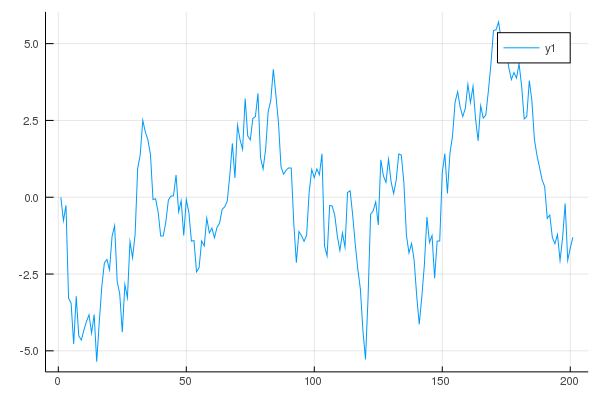

In [42]:
using Plots
gr(fmt=:png); # configuração para facilitar a exibição dos jupyter's notebook
α = 0.9
n = 200
x = zeros(n + 1)

for t in 1:n
    x[t+1] = α * x[t] + randn()
end
plot(x)

### Exercício 6

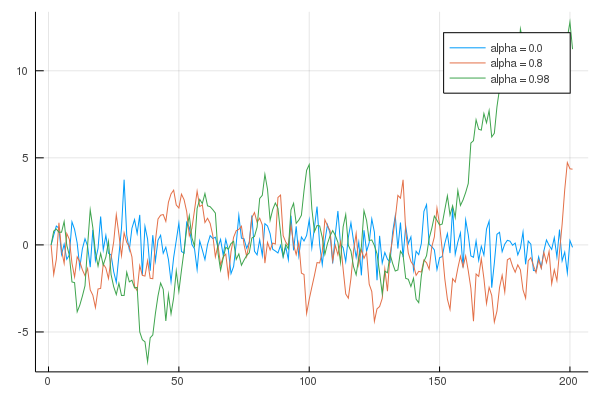

In [43]:
αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # nomeando um plot a ser adicionado 

for α in αs
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
    plot!(p, x, label = "alpha = $α") # adicione o plot p
end
p # gráfico de exibição

### Exercício 7: Dica

Como sugestão, observe o seguinte padrão para encontrar o número de empates de um número aleatório uniforme até que esteja abaixo de um determinado limite.

In [44]:
function drawsuntilthreshold(threshold; maxdraws=100)
    for i in 1:maxdraws
        val = rand()
        if val < threshold # verifica o limite
            return i # deixa função, retorna o número 
        end
    end
    return Inf # Se aqui, atinge os maxdraws
end

draws = drawsuntilthreshold(0.2, maxdraws=100)

6

Além disso, às vezes é conveniente adicionar apenas para enviar números para uma matriz sem indexá-la diretamente.

In [45]:
vals = zeros(0) # vetor vazio

for i in 1:100
    val = rand()
    if val < 0.5
        push!(vals, val)
    end
end
println("There were $(length(vals)) below 0.5")

There were 54 below 0.5
